## Overlay com Mapa


In [ ]:
!pip install geopandas

In [ ]:
import geopandas as gpd
from geopandas import GeoSeries
from shapely.geometry import Polygon, Point
import pandas as pd
import folium
import branca
import branca.colormap as cm
from math import cos, asin, sqrt

In [ ]:
m = folium.Map([-22.925778948753702, -43.489029909370046], zoom_start=8, tiles='cartodbpositron')

colormap = ['magenta', 'red', 'orange', 'yellow']
folium.LatLngPopup().add_to(m)

In [ ]:
df_estacoes = pd.read_csv('estacoes_pluviometricas.csv')

#Estações COR
df_estacoes_pluviometricas = df_estacoes[~df_estacoes['N'].isin([1,11,16,19,20,22,28,32])]
df_estacoes_meteorologicas = df_estacoes[df_estacoes['N'].isin([1,11,16,19,20,22,28,32])]


#Estações INMET
dfnew = pd.read_json('https://apitempo.inmet.gov.br/estacoes/T')
df_estacoes_INMET = dfnew[dfnew['SG_ESTADO'] == 'RJ']

inmet_oeste = ['A636','A621','A602']
inmet_sul = ['A652']

#Desenhar as estações pluviométricas do COR em vermelho
lat = list(df_estacoes_pluviometricas.Latitude)
lon = list(df_estacoes_pluviometricas.Longitude)

for loc in zip(lat, lon):
    folium.Circle(
        location=loc,
        radius=20,
        fill=True,
        color='red',
        fill_opacity=0.7
    ).add_to(m)

#Desenhar as estações meteorológicas do COR em verde
lat = list(df_estacoes_meteorologicas.Latitude)
lon = list(df_estacoes_meteorologicas.Longitude)

for loc in zip(lat, lon):
    folium.Circle(
        location=loc,
        radius=20,
        fill=True,
        color='green',
        fill_opacity=0.7
    ).add_to(m)

#Desenhar as estações meteorológicas do INMET em roxo
lat = list(df_estacoes_INMET.VL_LATITUDE)
lon = list(df_estacoes_INMET.VL_LONGITUDE)

for loc in zip(lat, lon):
    folium.Circle(
        location=loc,
        radius=20,
        fill=True,
        color='purple',
        fill_opacity=0.7
    ).add_to(m)

lat = [-22.81]
lon = [-43.25]

for loc in zip(lat, lon):
    folium.Circle(
        location=loc,
        radius=40,
        fill=True,
        color='yellow',
        fill_opacity=0.7
    ).add_to(m)


lat = [-22.955139]
lon = [-43.248278]

for loc in zip(lat, lon):
    folium.Circle(
        location=loc,
        radius=100,
        fill=True,
        color='black',
        fill_opacity=0.7
    ).add_to(m)

lat = [-22.955139]
lon = [-43.248278]

for loc in zip(lat, lon):
    folium.Circle(
        location=loc,
        radius=137100,
        fill=True,
        color='gray',
        fill_opacity=0.1
    ).add_to(m)
m


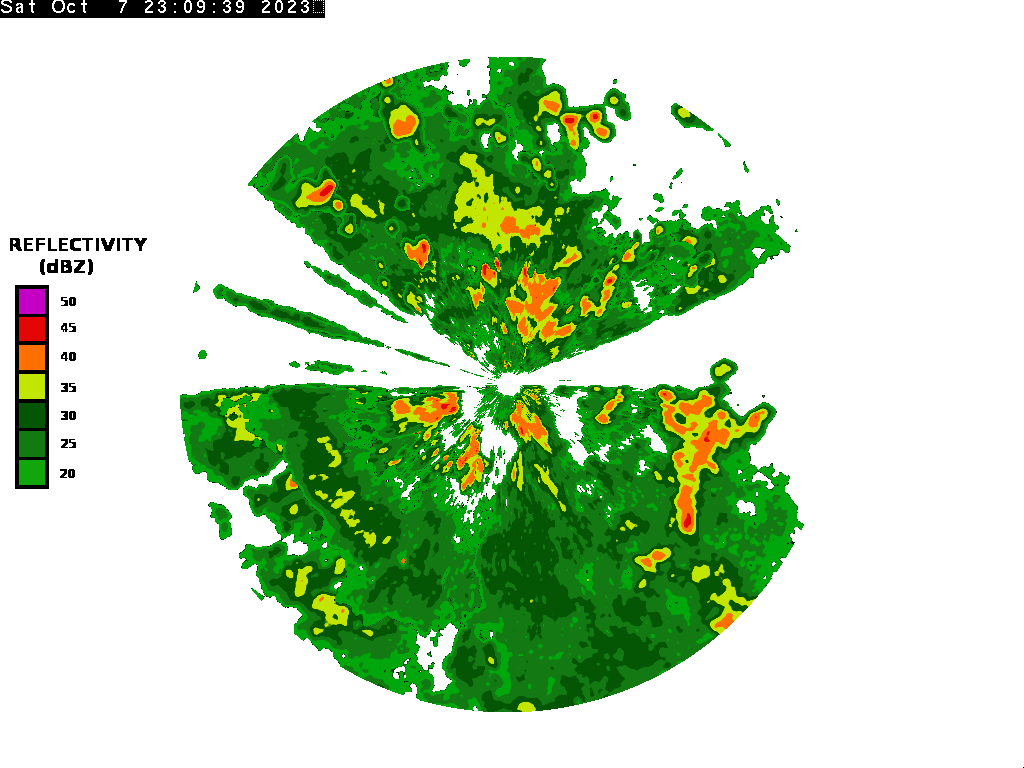

In [ ]:
folium.raster_layers.ImageOverlay(
    image="teste2png.png",
    bounds=[[-21.513778948753702, -45.299029909370046], [-24.385778948753702, -41.162029909370046]],
    colormap=lambda x: (1, 0, 0, x),
    origin="lower",
    opacity=0.5,
).add_to(m)

m

##Overlay na imagem

In [ ]:
from PIL import Image, ImageDraw
import pandas as pd

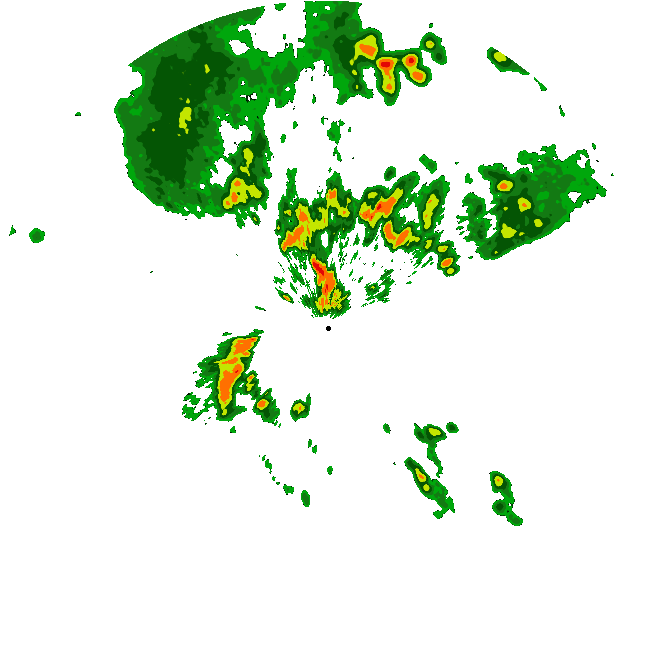

In [ ]:
tst = Image.open("2024_01_13_16_37.png")

draw = ImageDraw.Draw(tst)
draw.circle((tst.width/2,tst.height/2),2,"black")
tst

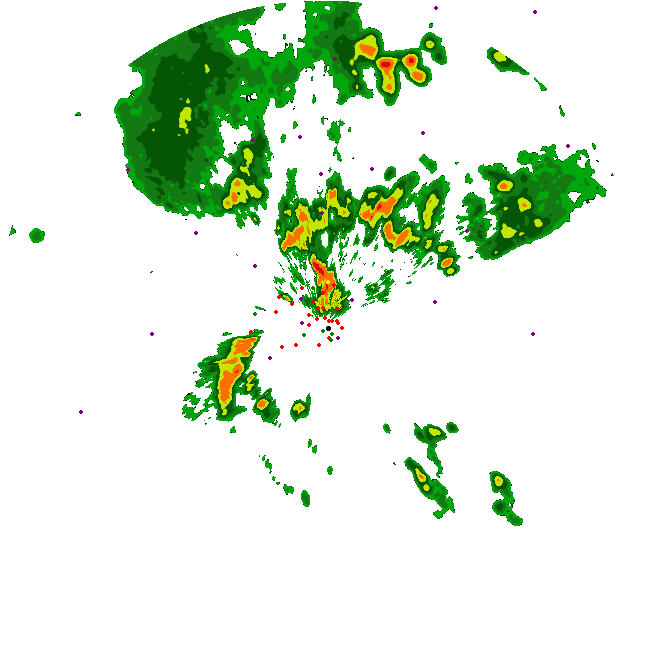

In [ ]:
pos_sumare = (-22.955139,-43.248278)
pos_sumare_img = (tst.height/2, tst.width/2)

dify = (pos_sumare_img[0]/pos_sumare[0])
difx = (pos_sumare_img[1]/pos_sumare[1])

df_estacoes = pd.read_csv('estacoes_pluviometricas.csv')

#Estações COR
df_estacoes_pluviometricas = df_estacoes[~df_estacoes['N'].isin([1,11,16,19,20,22,28,32])]
df_estacoes_meteorologicas = df_estacoes[df_estacoes['N'].isin([1,11,16,19,20,22,28,32])]


#Estações INMET
dfnew = pd.read_json('https://apitempo.inmet.gov.br/estacoes/T')
df_estacoes_INMET = dfnew[dfnew['SG_ESTADO'] == 'RJ']

inmet_oeste = ['A636','A621','A602']
inmet_sul = ['A652']

#Desenhar as estações pluviométricas do COR em vermelho
lat = list(df_estacoes_pluviometricas.Latitude)
lon = list(df_estacoes_pluviometricas.Longitude)

for loc in zip(lat, lon):
    posx = pos_sumare[1] - ((loc[1] - pos_sumare[1]) * 22)
    valorx = posx * difx

    posy = pos_sumare[0] + ((loc[0] - pos_sumare[0]) * 22)
    valory = posy * dify
    draw.circle((valorx,valory),1.5,"red")


#Desenhar as estações meteorológicas do COR em verde
lat = list(df_estacoes_meteorologicas.Latitude)
lon = list(df_estacoes_meteorologicas.Longitude)

for loc in zip(lat, lon):
    posx = pos_sumare[1] - ((loc[1] - pos_sumare[1]) * 22)
    valorx = posx * difx

    posy = pos_sumare[0] + ((loc[0] - pos_sumare[0]) * 22)
    valory = posy * dify
    draw.circle((valorx,valory),1.5,"green")

#Desenhar as estações meteorológicas do INMET em roxo
lat = list(df_estacoes_INMET.VL_LATITUDE)
lon = list(df_estacoes_INMET.VL_LONGITUDE)

for loc in zip(lat, lon):
    posx = pos_sumare[1] - ((loc[1] - pos_sumare[1]) * 22)
    valorx = posx * difx

    posy = pos_sumare[0] + ((loc[0] - pos_sumare[0]) * 22)
    valory = posy * dify
    draw.circle((valorx,valory),1.5,"purple")

lat = [-22.81]
lon = [-43.25]

for loc in zip(lat, lon):
    posx = pos_sumare[1] - ((loc[1] - pos_sumare[1]) * 22)
    valorx = posx * difx

    posy = pos_sumare[0] + ((loc[0] - pos_sumare[0]) * 22)
    valory = posy * dify
    draw.circle((valorx,valory),1.5,"yellow")

tst

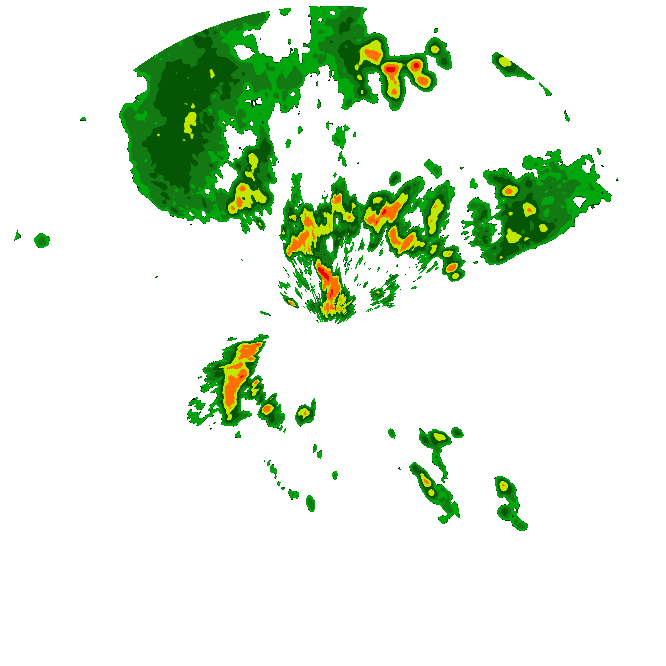

In [ ]:
tst = Image.open("2024_01_13_16_37.png")

width, height = tst.size   # Get dimensions
new_width = new_height =666
left = (width - new_width)/2
top = (height - new_height)/2
right = (width + new_width)/2
bottom = (height + new_height)/2

# Crop the center of the image
tst2 = tst.crop((left, top, right, bottom))
tst2